# Q1:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

## part one:


In [40]:
def simulate_game(N,p_win = (18/38)):
    choices = [1,-1]
    outputs = np.random.choice(choices, size=N, p=[p_win,1-p_win])
    return np.sum(outputs)



## part two:

N=10 -> Mean: -0.52574, Std: 3.1548498304039767, Skewness: 0.038416905796989254
N=25 -> Mean: -1.32278, Std: 4.999801303211958, Skewness: 0.029550766321428692
N=100 -> Mean: -5.28194, Std: 9.948565214964416, Skewness: 0.004218577964472584
N=1000 -> Mean: -52.7875, Std: 31.635322722393717, Skewness: -0.011730168061007329


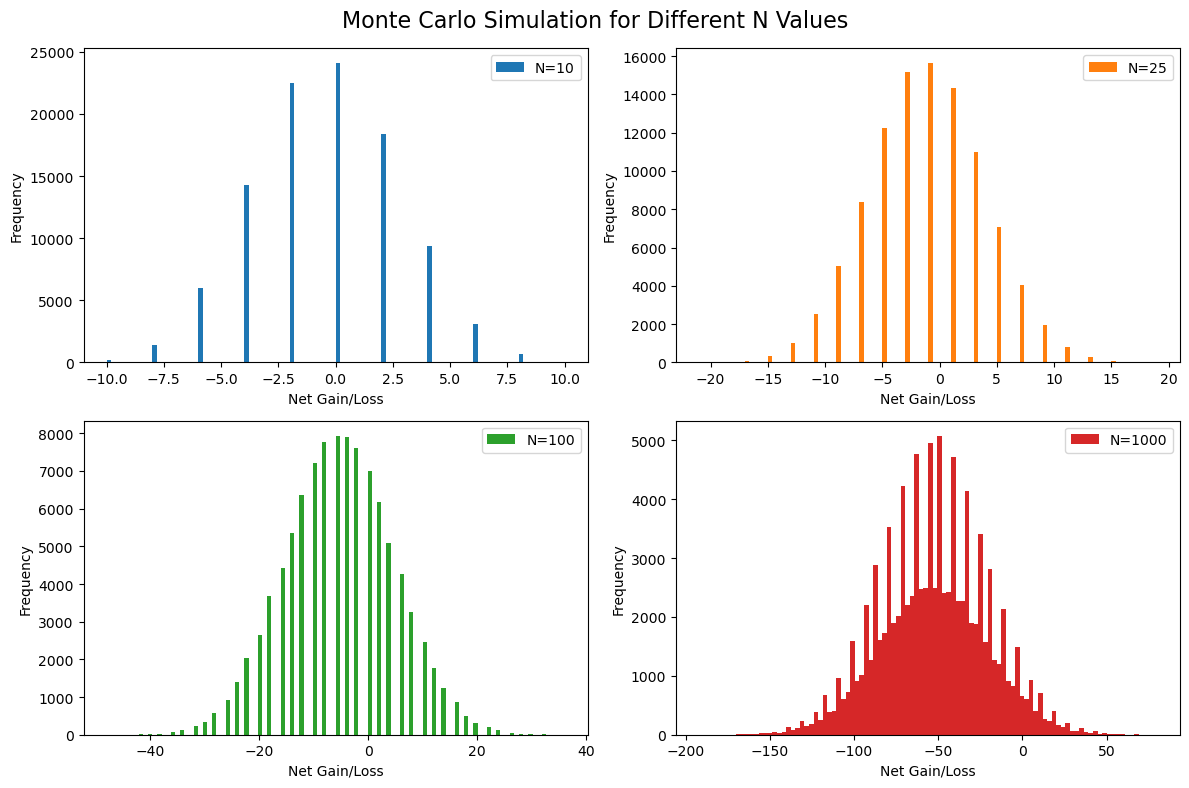

In [41]:
def monte_carlo_simulation(N, num_simulations=100000, p_win=18/38):
    results = []
    for _ in range(num_simulations):
        results.append(simulate_game(N, p_win))
    return results

def plot_SN_simulation(N_values, num_simulations=100000, p_win=18/38):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Monte Carlo Simulation for Different N Values", fontsize=16)
    axes = axes.flatten()
    for i, n in enumerate(N_values):
        Sn_results = monte_carlo_simulation(n, num_simulations, p_win)
        axes[i].hist(Sn_results, color=f"C{i}",bins=100, label=f'N={n}')
        axes[i].set_xlabel("Net Gain/Loss")
        axes[i].set_ylabel("Frequency")
        axes[i].legend()

        mean = np.mean(Sn_results)
        std = np.std(Sn_results)
        skewness = skew(Sn_results)
        print(f"N={n} -> Mean: {mean}, Std: {std}, Skewness: {skewness}")
    plt.tight_layout()
    plt.show()

N_values = [10, 25, 100, 1000]
plot_SN_simulation(N_values)

# part three:

N=10 -> Mean: -0.053078000000000014, Std: 0.3155755470818359, Skewness: 0.029224044357639773
N=25 -> Mean: -0.052576800000000014, Std: 0.19932132876779646, Skewness: 0.010392269200615749
N=100 -> Mean: -0.05234979999999999, Std: 0.0997416584981421, Skewness: 0.018085157133094183
N=1000 -> Mean: -0.05261940000000002, Std: 0.031440244649811495, Skewness: 0.0013269341975142034


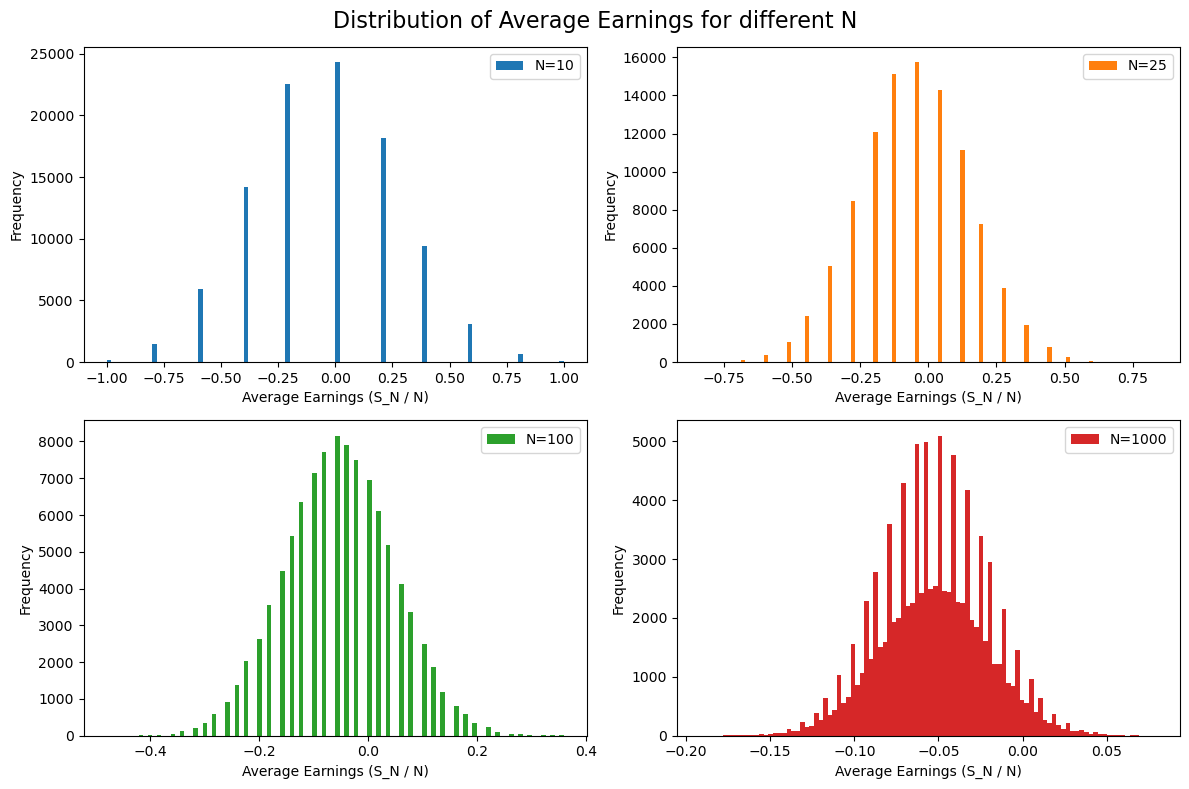

In [42]:
def plot_avg_Sn_simulation(N_values, num_simulations=100000, p_win=18/38):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Distribution of Average Earnings for different N", fontsize=16)
    axes = axes.flatten()
    for i, n in enumerate(N_values):
        Sn_results = monte_carlo_simulation(n, num_simulations, p_win)
        avg_Sn_results = [resulot/n for resulot in Sn_results]
        axes[i].hist(avg_Sn_results, color=f"C{i}",bins=100, label=f'N={n}')
        axes[i].set_xlabel("Average Earnings (S_N / N)")
        axes[i].set_ylabel("Frequency")
        axes[i].legend()

        mean = np.mean(avg_Sn_results)
        std = np.std(avg_Sn_results)
        skewness = skew(avg_Sn_results)
        print(f"N={n} -> Mean: {mean}, Std: {std}, Skewness: {skewness}")
    plt.tight_layout()
    plt.show()

N_values = [10, 25, 100, 1000]
plot_avg_Sn_simulation(N_values)

## part four:

In [43]:
def calculte_theoretical_values(N, p_win=(18/38)):
    p_loss = 1 - p_win
    mean = N*((p_win*1) + (p_loss*(-1)))
    variance = N * (1**2 * p_win + (-1)**2 * p_loss - (1 * p_win + (-1) * p_loss)**2)    
    std = (variance)**(1/2)
    return mean,std

def compare_theo_prac(N_values, num_simulations=100000, p_win=18/38):
    result = []
    for n in N_values:
        mean, std = calculte_theoretical_values(n, p_win)
        Sn_results = monte_carlo_simulation(n, num_simulations, p_win)
        mean_prac = np.mean(Sn_results)
        std_prac = np.std(Sn_results)
        result.append(
            {
                "N": n,
                "Theoretical Mean": mean,
                "Practical Mean": mean_prac,
                "Theoretical Std": std,
                "Practical Std": std_prac,
            }
        )
    return pd.DataFrame(result)

N_values = [10, 25, 100, 1000]
compare_theo_prac(N_values)

,N,Theoretical Mean,Practical Mean,Theoretical Std,Practical Std
0,10,-0.526316,-0.52246,3.157895,3.152960
1,25,-1.315789,-1.34158,4.993070,4.991794
2,100,-5.263158,-5.25818,9.986140,9.963786
3,1000,-52.631579,-52.46210,31.578947,31.678397


## part five:

In [44]:
from scipy.stats import norm

def calculate_theo_prob(N, p_win=18/38):
    mean, std = calculte_theoretical_values(N, p_win)
    z_score = (0 - mean) / std
    prob_clt = 1 - norm.cdf(z_score)
    return prob_clt

def calculate_casino_loses_prob(N, num_simulations=100000,p_win=18/38):
    prob_clt = calculate_theo_prob(N, p_win)
    Sn_results = monte_carlo_simulation(N, num_simulations, p_win)
    prob_prac = len([x for x in Sn_results if x > 0]) / num_simulations
    return prob_clt, prob_prac

N = 25
prob_clt, prob_prac = calculate_casino_loses_prob(N)
print(f"Probability of Casino Losing Money (N={N})")
print(f"Theoretical(CLT): {prob_clt:.5f}")
print(f"Practical(Monte Carlo): {prob_prac}")




Probability of Casino Losing Money (N=25)
Theoretical(CLT): 0.39607
Practical(Monte Carlo): 0.39566


## part six:

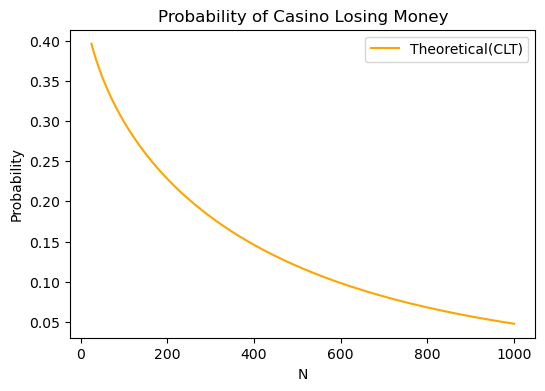

In [45]:
def plot_casino_loses_prob(N_values,p_win=18/38):
    prob_clt_values = []
    for n in N_values:
        prob_clt= calculate_theo_prob(n, p_win)
        prob_clt_values.append(prob_clt)
    plt.figure(figsize=(6,4))
    plt.title("Probability of Casino Losing Money")
    plt.plot(N_values, prob_clt_values, label="Theoretical(CLT)", color="orange")
    plt.xlabel("N")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()
    
N_values = np.arange(25,1001)
plot_casino_loses_prob(N_values)